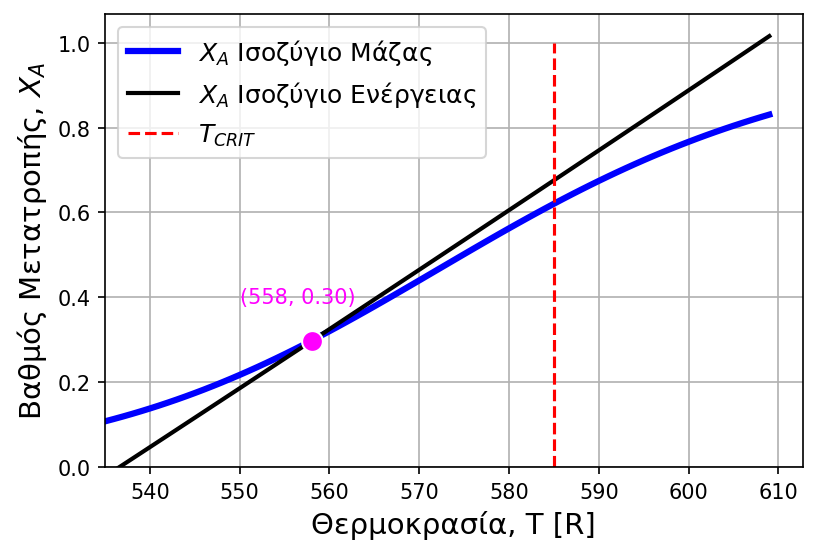

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Variable Model Parameters (Change these to reacreate the graphs from the lecture slides)
Qo = 326.3           # Volumetric Flowrate (Inlet) (ft^3/h) - Default 326.3
To = 534.67          # Reactor Inlet Temperature (R)        - Default 534.67

# Fixed Model Parameters
V = 40.1             # Reactor Volume (ft^3)
Tr = 527.67          # Reference Temperature (R)
CpA = 35             # Heat Capacity Propylene Oxide (BTU/lb-mol/R)
CpB = 18             # Heat Capacity Water (BTU/lb-mol/R)
CpC = 46             # Heat Capacity Propylene Glycol (BTU/lb-mol/R)
CpM = 19.5           # Heat Capacity Methanol (BTU/lb-mol/R)
k0 = 16.96e12        # Frequency coefficient (1/h)
E = 32400            # Activation Energy (kcal/kmol)
DHr_tr = 36000       # Heat of Reaction (kcal/kmol)
FAo = 43.04          # Propylene Oxide Inlet Stream (lb-mol/ft^3)
FBo = 804.75         # Water Inlet Stream (lb-mol/ft^3)
FMo = 71.89          # Methanol Inlet Stream (lb-mol/ft^3)
CAo = 0.132          # Inlet Stream Concentration Propylene Oxide (lb-mol/ft^3)
R = 1.987            # Universal Gas Constant (BTU/lb-mol/R)

Tc = 545;            # Coolant Temperature (R)
U = 100;             # Coil Heat Transfer Coefficient (BTU/h/ft^2/F)
A = 40;              # Coil Surface Area (ft^2)

# Temperature range (Rankine)
T = np.arange(535, 610)  # Temperature range from 535 to 640 R

# Auxiliary Equations
tau = V / Qo
k = k0 * np.exp(-E / (R * T))

# Mass and Energy Balances
X_mb = tau * k / (1 + tau * k)
X_eb = ((FAo/FAo*CpA + FBo/FAo*CpB + FMo/FAo*CpM)*(T-To)+ U*A/FAo*(T-Tc))/(DHr_tr + (CpC - CpA - CpB)*(T-Tr))

# Find intersection points
difference = np.abs(X_mb - X_eb)
min_indices = np.where(difference < 0.002)[0]  # Intersection points with a small threshold

# Get the corresponding Temperature (T) and Conversion (X) values at these indices
intersection_T = T[min_indices]
intersection_X = X_mb[min_indices]

# Plotting
plt.figure(dpi=150)
plt.plot(T, X_mb, 'b-', linewidth=3, label='$X_A$ Ισοζύγιο Μάζας')
plt.plot(T, X_eb, 'k-', linewidth=2, label='$X_A$ Ισοζύγιο Ενέργειας')
plt.plot([585, 585], [0, 1], 'r--', label='$T_{{CRIT}}$', linewidth=1.5)
plt.grid(True)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=14)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=14)

# Mark and label intersection points
plt.scatter(intersection_T, intersection_X, color='magenta', s=100, edgecolor='white', zorder=5)
for i in range(len(intersection_T)):
    plt.text(intersection_T[i]-8, intersection_X[i]+0.08, f'({intersection_T[i]:.0f}, {intersection_X[i]:.2f})', 
             color='magenta', fontsize=10, ha='left', va='bottom')

plt.legend(fontsize=12)
plt.xlim(left=535)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 275
#plt.title("Βαθμός Μετατροπής vs Θερμοκρασία")
plt.show()
